In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = input_data.read_data_sets("G:/dldata/MNIST_data/",one_hot=True)  #one_hot=True独热编码

Extracting G:/dldata/MNIST_data/train-images-idx3-ubyte.gz
Extracting G:/dldata/MNIST_data/train-labels-idx1-ubyte.gz
Extracting G:/dldata/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting G:/dldata/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print('训练集 train数量：',mnist.train.num_examples,
      ';  验证集 validation数量：', mnist.validation.num_examples,
      ';  测试集 test数量：',mnist.test.num_examples)

训练集 train数量： 55000 ;  验证集 validation数量： 5000 ;  测试集 test数量： 10000


In [4]:
print('train images shape:',mnist.train.images.shape,  #55000条数据，每条数据长784（28*28）
      'labels shape:',mnist.train.labels.shape)  #55000条数据， 10分类 One Hot编码

train images shape: (55000, 784) labels shape: (55000, 10)


In [5]:
len(mnist.train.images[0])

784

In [6]:
mnist.train.images[0].shape

(784,)

In [7]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [8]:
mnist.train.images[0].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [31]:
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

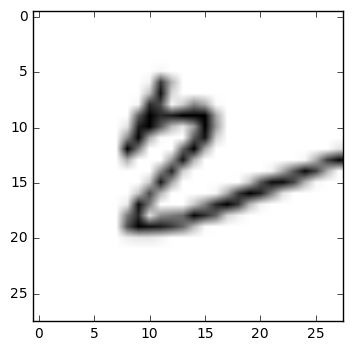

In [37]:
plot_image(mnist.train.images[0])

In [11]:
mnist.train.labels[1]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [12]:
np.argmax(mnist.train.labels[1])

3

In [13]:
x = tf.placeholder(tf.float32, [None, 784], name="X") #不确定一次性处理多少条数据
y = tf.placeholder(tf.float32, [None, 10], name="Y")  #因为有10个标签，所以10列
 
w = tf.Variable(tf.random_normal([784, 10]), name="W")  #shape为（784，10）,10为得到的标签，random_normal生成平均为0，标准差为1的正态随机数
b = tf.Variable(tf.zeros([10]),name="B")  #生成10个0作为标签

In [14]:
forward = tf.matmul(x,w) + b #向前计算

In [15]:
pred = tf.nn.softmax(forward) #Softmax分类,进行归一化

In [16]:
#设置训练参数
train_epochs = 100
batch_size = 100  #单次训练样本数 
total_batch = int(mnist.train.num_examples/batch_size)  #一轮训练有多少批次
display_step = 1
learning_rate = 0.01

In [17]:
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))

    #    array = np.array([[1,2,3],[4,5,6]])
    #    with tf.Session() as sess:
    #       print(sess.run(tf.reduce_sum(array, reduction_indices=0)))  按列求和
    #       print(sess.run(tf.reduce_sum(array, reduction_indices=1)))  按行求和
    #        
    #    输出：  [ 6 15]
    #            [5 7 9]
    


In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [19]:
#检查预测类别tf.argmax(pred, 1)与实际类别tf.argmax(y, 1)的匹配情况,计算精准度
correct_prediction = tf.equal(tf.arg_max(pred, 1), tf.arg_max(y, 1))

    #    arr=
    #    [[1,2,3]
    #     [3,2,1]
    #     [4,7,2]
    #     [8,3,2]]
    #    tf.argemax(arr,0)  找出每列最大值，由行号显示[3,2,0]
    #    tf.argemax(arr,1)  找出每行最大值，由列号显示[2,0,1,0]
    #    tf.argemax(arr,-1) 最后一维度，行列，所以还是列，找出每行最大值，由列号显示[2,0,1,0]
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) #准确率，布尔值转化为浮点数，并计算平均值

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs,ys = mnist.train.next_batch(batch_size)   #批量读取样本，xs图像的数据，ys标签的数据
        sess.run(optimizer, feed_dict={x:xs, y:ys})
        
    loss,acc = sess.run([loss_function,accuracy],
                       feed_dict={x:mnist.validation.images, y:mnist.validation.labels})
    
    if (epoch+1) % display_step == 0:
        print("Train Epoch:", '%02d'%(epoch+1), "loss=", "{:.9f}".format(loss),
              "Accuracy=","{:.4}".format(acc))
print("Train Finished!")

Train Epoch: 01 loss= 5.112107277 Accuracy= 0.347
Train Epoch: 02 loss= 3.339106560 Accuracy= 0.4736
Train Epoch: 03 loss= 2.503149271 Accuracy= 0.5676
Train Epoch: 04 loss= 2.049315214 Accuracy= 0.627
Train Epoch: 05 loss= 1.765513301 Accuracy= 0.669
Train Epoch: 06 loss= 1.578026295 Accuracy= 0.6986
Train Epoch: 07 loss= 1.442036510 Accuracy= 0.7214
Train Epoch: 08 loss= 1.342425823 Accuracy= 0.7392
Train Epoch: 09 loss= 1.262563348 Accuracy= 0.7508
Train Epoch: 10 loss= 1.198016405 Accuracy= 0.7602
Train Epoch: 11 loss= 1.144278765 Accuracy= 0.771
Train Epoch: 12 loss= 1.099654436 Accuracy= 0.7782
Train Epoch: 13 loss= 1.059573889 Accuracy= 0.7834
Train Epoch: 14 loss= 1.025410771 Accuracy= 0.7884
Train Epoch: 15 loss= 0.995218158 Accuracy= 0.7956
Train Epoch: 16 loss= 0.968298256 Accuracy= 0.8006
Train Epoch: 17 loss= 0.943991423 Accuracy= 0.8046
Train Epoch: 18 loss= 0.921034396 Accuracy= 0.807
Train Epoch: 19 loss= 0.900495291 Accuracy= 0.8104
Train Epoch: 20 loss= 0.882002175 Ac

In [22]:
accu_test = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
print("Test Accuracy:",accu_test)  #测试集上的准确率

Test Accuracy: 0.8765


In [23]:
print(mnist.test.images.shape)

(10000, 784)


In [24]:
#应用预测
prediction_result = sess.run(tf.argmax(pred,1),feed_dict={x:mnist.test.images})
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

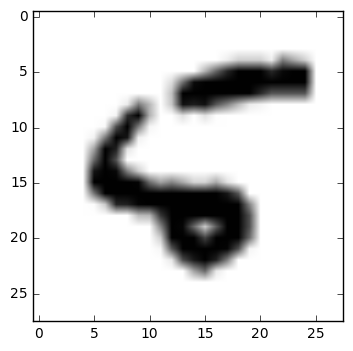

In [25]:
plot_image(mnist.test.images[8])

In [26]:
def plot_images_labels_prediction(images,     #图像列表
                                 labels,     #标签列表
                                 prediction, #预测值列表
                                 index,      #从第index个开始显示
                                 num=10):    #缺省一次显示10幅
    fig = plt.gcf()   #获取当前图表，Get Current Figure
    fig.set_size_inches(10,10) #定义显示图片宽和高，单位英寸2.54cm
    if num > 25:  #设置最多显示25幅
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1) #获取当前要处理的子图,5行5列的显示
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary') #显示第index个图像
        
        title = "label=" + str(np.argmax(labels[index]))  #构建label信息
        if len(prediction)>0:
            title += ",predict=" + str(prediction[index])  #有预测值的话构建预测值
            
        ax.set_title(title,fontsize=10) #显示title信息（label and predict）
        
        ax.set_xticks([])  #不显示x轴，y轴数值
        ax.set_yticks([])
        
        index += 1
    plt.show()

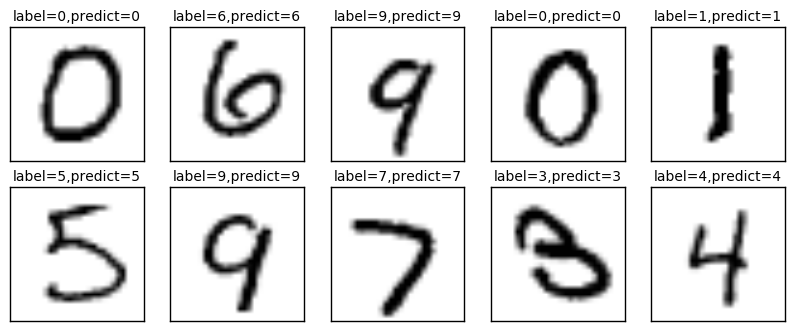

In [27]:
plot_images_labels_prediction(mnist.test.images,
                             mnist.test.labels,
                             prediction_result,10,10)